In [1]:
from sdm.utils import set_project_wd
set_project_wd()

Current Working Directory: /Users/matthewwhittle/Data Science/shefflied-bats


In [2]:
from sdm.extract import ClimateData
climate_data = ClimateData()

In [3]:
# Load the boundary
import geopandas as gpd
boundary = gpd.read_file('data/processed/boundary.geojson')
# add a 7km buffer
boundary["geometry"] = boundary.buffer(7000)
boundary

,County,geometry
0,South Yorkshire,"POLYGON ((405311.395 397590.198, 404994.583 39..."


In [4]:
bioclim = climate_data.get_dataset(variable="bio", aoi=boundary)
temp_average = climate_data.get_dataset(variable="tavg", aoi=boundary)
precipitation = climate_data.get_dataset(variable="prec", aoi=boundary)

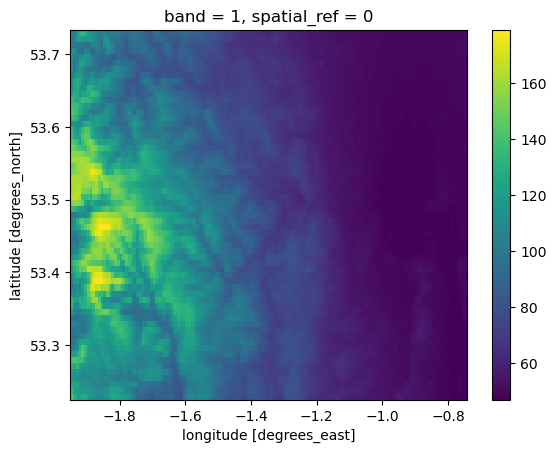

In [5]:
precipitation[0].plot()

# Reprojections

The climate data is a coarse resolution and we will model it at 100m so I'm reprojecting it to a flat projection and 100m resolution.

In [6]:
import re
from rasterio.enums import Resampling
import numpy as np
def reproject_data(array, crs, resolution):
    # reproject the data
    reprojected = array.rio.reproject(crs, resolution=resolution,   resampling=Resampling.bilinear)
    # Fix the no data values
    reprojected = reprojected.where(reprojected != reprojected.rio.nodata, np.nan)
    reprojected.rio.write_nodata(np.nan, inplace=True)
    return reprojected

# reproject the data
bioclim = reproject_data(bioclim, crs=27700, resolution=100)
temp_average = reproject_data(temp_average, crs=27700, resolution=100)
precipitation = reproject_data(precipitation, crs=27700, resolution=100)

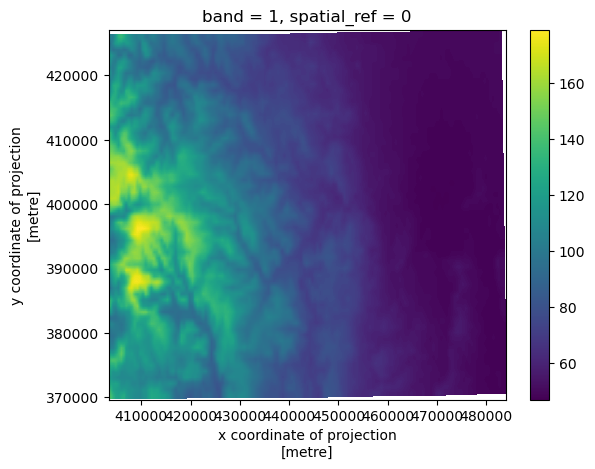

In [7]:
precipitation[0].plot()

In [11]:
from sdm.geo import reproject_to_model_raster

temp_average = reproject_to_model_raster(temp_average)
precipitation = reproject_to_model_raster(precipitation)
bioclim = reproject_to_model_raster(bioclim)

# Write Data

In [13]:
temp_average.rio.to_raster("data/evs/temp_average.tif")
precipitation.rio.to_raster("data/evs/precipitation.tif")
bioclim.rio.to_raster("data/evs/bioclim.tif")